# In this notebook we are going to Cover Technical Analysis of Stocks
##Libraries Used:
* TA-Lib (Technical Analysis Library)
* NumPy
* Maptplotlib
* Pandas Datareader
* Yahoofinance API

##Installing Libraries

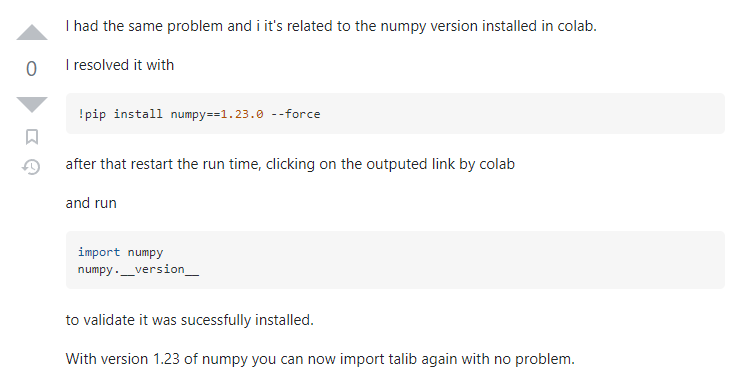

# First Time Run (Google Colab)
1. Force Install Latest NumPy
3. Restart runtime environment
3. Create ta-lib directory (below)
4. Run-all

In [190]:
# !pip install numpy==1.23.0 --force    # Uncomment for first time run (Google Colab)

In [ ]:
import os
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar xvzf ta-lib-0.4.0-src.tar.gz
os.chdir('ta-lib')
!./configure --prefix=/usr
!make
!make install
os.chdir('../')

In [172]:
import numpy as np
np.__version__

'1.23.0'

In [ ]:
!python3 -m pip install TA-Lib

In [229]:
import datetime as dt
import talib as ta
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf    # Using Yahoo API for Stock Data
yf.pdr_override()

In [230]:
data = pdr.get_data_yahoo("AAPL") # Retrieve Stock information of Apple from 1980-2023

[*********************100%***********************]  1 of 1 completed


## Terminology
* Open =  Price from the first transaction of a business day
* Close = Last price anyone paid for a share of that stock during the business hours of the exchange
* High = Highest value of stock price at given date
* Low = Lowest value of stock price at given date
* Adjusted Close = Closing price after adjustments for all applicable splits and dividend distributions
* Volume = Number of shares traded in a particular stock

In [231]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099584,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094388,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087461,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089625,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092224,73449600
...,...,...,...,...,...,...
2023-05-23,173.130005,173.380005,171.279999,171.559998,171.559998,50747300
2023-05-24,171.089996,172.419998,170.520004,171.839996,171.839996,45143500
2023-05-25,172.410004,173.899994,171.690002,172.990005,172.990005,56058300


## Calculating the Simple Moving Average
* SMA = average price over the specified period

In [232]:
data['SMA_100'] = ta.SMA(data['Close'],100) # Creating a new SMA Column for period 100 days

In [233]:
data.iloc[100:] # Removing the first 100 entries - Cant take average of first 100 values

,Open,High,Low,Close,Adj Close,Volume,SMA_100
Date,,,,,,,
1981-05-07,0.123884,0.124442,0.123884,0.123884,0.096120,9363200,0.124620
1981-05-08,0.125000,0.125558,0.125000,0.125000,0.096986,7907200,0.124654
1981-05-11,0.122768,0.122768,0.122210,0.122210,0.094821,11939200,0.124749
1981-05-12,0.122210,0.123884,0.122210,0.122210,0.094821,4256000,0.124816
1981-05-13,0.122210,0.123326,0.121652,0.121652,0.094388,4905600,0.124844
...,...,...,...,...,...,...,...
2023-05-23,173.130005,173.380005,171.279999,171.559998,171.559998,50747300,154.664700
2023-05-24,171.089996,172.419998,170.520004,171.839996,171.839996,45143500,155.087000
2023-05-25,172.410004,173.899994,171.690002,172.990005,172.990005,56058300,155.517600


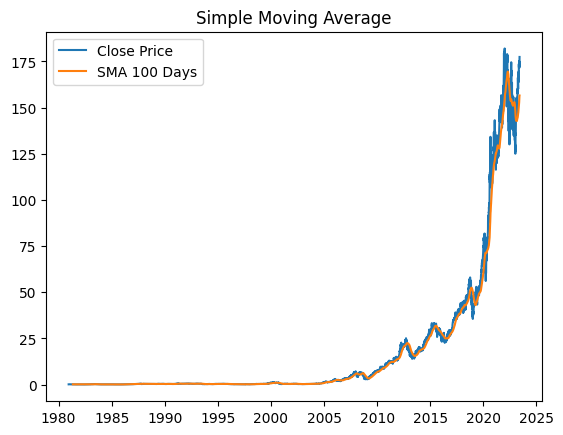

In [234]:
plt.plot(data['Close'], label="Close Price")
plt.plot(data['SMA_100'], label="SMA 100 Days")
plt.title("Simple Moving Average")
plt.legend()


## Calculating the Exponential Moving Average
* EMA = technical chart indicator that tracks the price of an investment over time

In [235]:
data['EMA_100'] = ta.EMA(data['Close'],100)

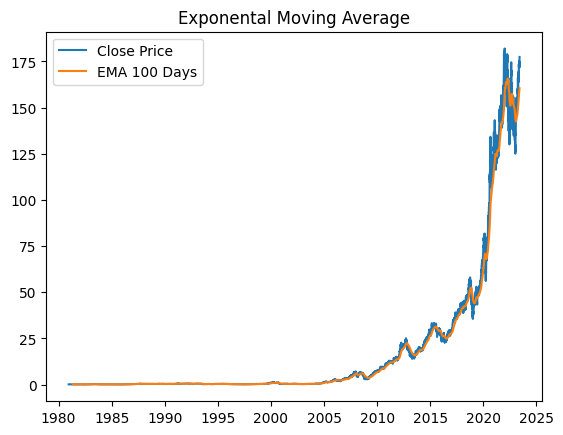

In [237]:
plt.plot(data['Close'], label="Close Price")
plt.plot(data['EMA_100'], label="EMA 100 Days")
plt.title("Exponental Moving Average")
plt.legend()

## Calculating the Relative Strength Index
* RSI = Momentum indicator used in technical analysis used in the analysis of financial markets. It is intended to chart the current and historical strength or weakness of a stock or market based on the closing prices of a recent trading period.
* `RSI Above 70% = Bearish Indicator (Stock Overbought/Overvalued)`
* `RSI Below 30% = bullish sign (Stock oversold/undervalued condition)`


In [238]:
data["RSI"] = ta.RSI(data['Close']) # Default 14 Days

[Text(0.5, 1.0, 'Relative Strength Index')]

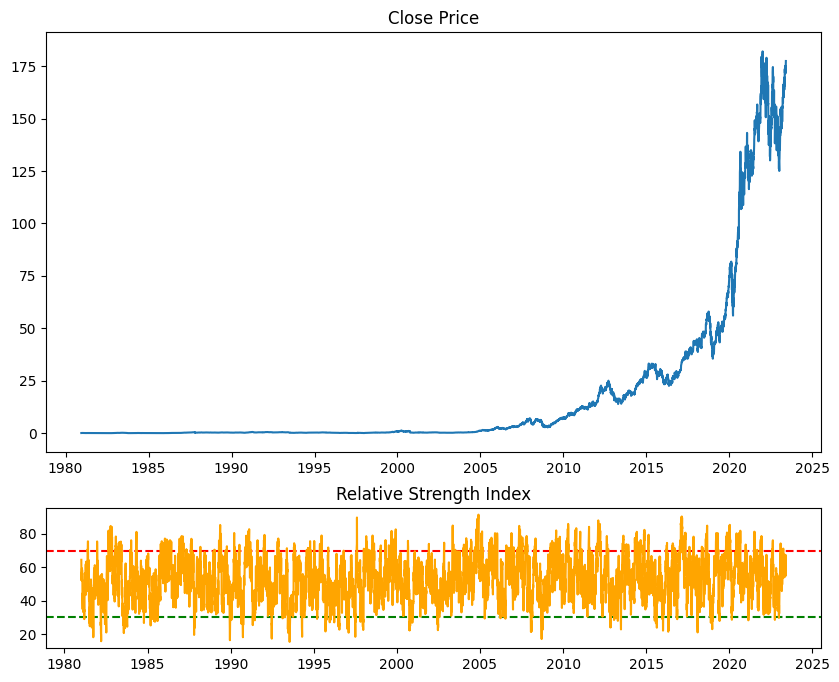

In [239]:
fig,ax = plt.subplots(2,1,gridspec_kw={"height_ratios":[3,1]},figsize=(10,8))

ax[0].plot(data['Close'])
ax[1].axhline(y=70,color="r",linestyle="--") # Usually want to Sell because Overbought
ax[1].axhline(y=30,color="g",linestyle="--") # Usually want to Buy because OverSold
ax[1].plot(data['RSI'],color="orange")
ax[0].set(title="Close Price")
ax[1].set(title="Relative Strength Index")

## Calculating the Linear Regression

In [240]:
data['LINEARREG'] = ta.LINEARREG(data['Close'],200)

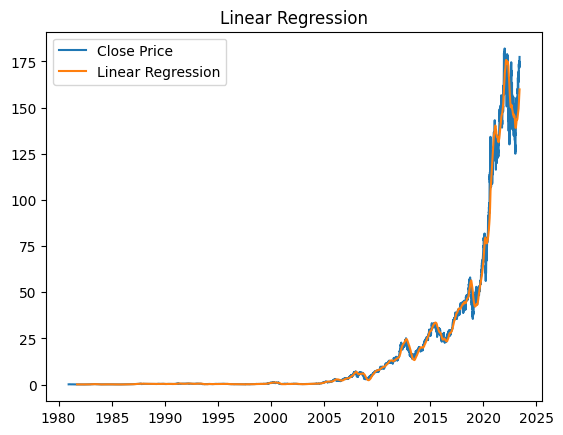

In [241]:
plt.plot(data['Close'], label="Close Price")
plt.plot(data['LINEARREG'], label="Linear Regression")
plt.title("Linear Regression")
plt.legend()

# Calculating the Moving average convergence/divergence
* MACD =  trend-following momentum indicator that shows the relationship between two exponential moving averages (EMAs) of a security’s price. The MACD line is calculated by subtracting the 26-period EMA from the 12-period EMA.
* The result of that calculation is the MACD line.
* Signal Line = A nine-day EMA of the MACD line, which is then plotted on top of the MACD line, which can function as a trigger for buy or sell signals
* `Traders buy = when the MACD line crosses above the signal line.`
* `Traders sell—or short = when the MACD line crosses below the signal line.`

[*********************100%***********************]  1 of 1 completed


<BarContainer object of 353 artists>

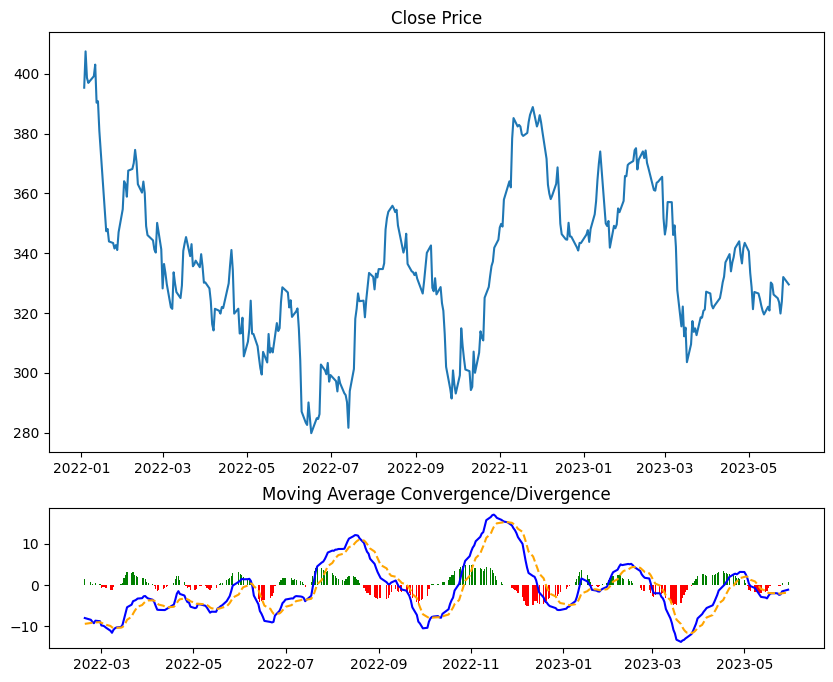

In [219]:
start = dt.datetime(2022,1,1)
end = dt.datetime.now()

data = pdr.get_data_yahoo("GS",start,end) # Retrieve Stock information of Apple from 1980-2023

macd, macd_signal, macd_hist = ta.MACD(data['Close'])

fig,ax = plt.subplots(2,1,gridspec_kw={"height_ratios":[3,1]},figsize=(10,8))
c = ["red" if cl < 0 else "green" for cl in macd_hist]

ax[0].set(title="Close Price")
ax[1].set(title="Moving Average Convergence/Divergence")
ax[0].plot(data['Close'])
ax[1].plot(macd, 'b-')
ax[1].plot(macd_signal, '--', color="orange")
ax[1].bar(macd_hist.index,macd_hist, color=c) # Bar used because hist bins are already the data

# Engulfing Pattern Recognition
* Pattern Recognition = looking for patterns that appear in the prices of traded instruments
* Bullish Engulfing Pattern = candlestick pattern that forms when a small black candlestick is followed the next day by a large white candlestick, the body of which completely overlaps or engulfs the body of the previous day’s candlestick.
* Bearish Engulfing Pattern = 

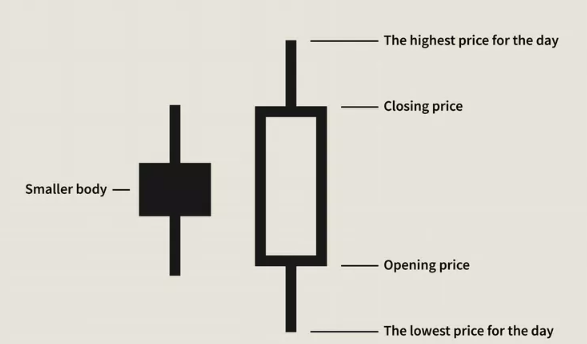

In [ ]:
!pip install mplfinance

In [ ]:
start = dt.datetime(2023,3,1)
end = dt.datetime.now()

data = pdr.get_data_yahoo("TSLA",start,end) # Retrieve Stock information of Apple from 1980-2023

In [223]:
data['ENGULFING'] = ta.CDLENGULFING(data['Open'],data['High'],data['Low'],data['Close'])

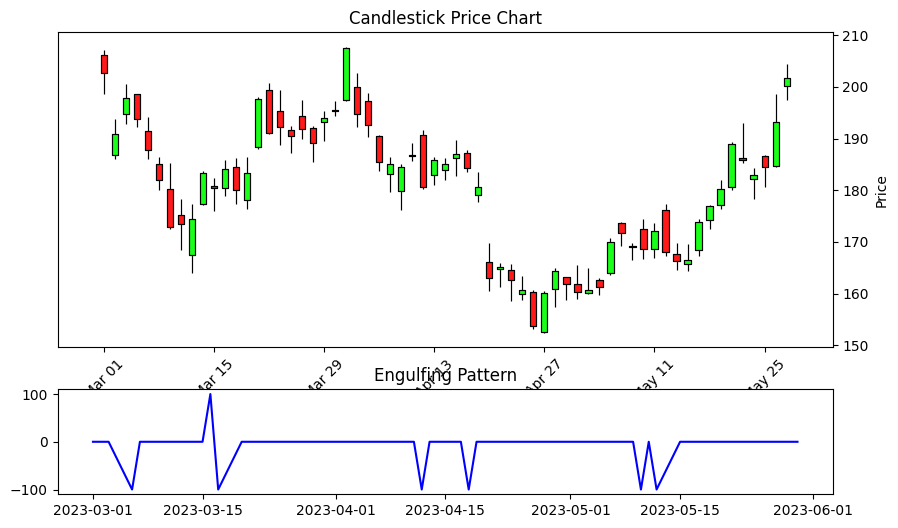

In [227]:
import mplfinance as mpf

fig,ax = plt.subplots(2,1,gridspec_kw={"height_ratios":[3,1]},figsize=(10,6))
colors = mpf.make_marketcolors(up="#00ff00",down="#ff0000")
mpf_style = mpf.make_mpf_style(base_mpf_style="yahoo", marketcolors=colors)
mpf.plot(data, type="candle",ax=ax[0],style=mpf_style)
ax[0].set(title="Candlestick Price Chart")
ax[1].set(title="Engulfing Pattern")
ax[1].plot(data['ENGULFING'], color="b")

* When Line goes down its Engulfing pattern is Bearish = -100 (Red engulfs Green) = maybe sell
* When Line goes Up its Engulfing pattern is Bullish = 100 (Green Engulfs Red) = maybe buy